# Uncertainty exercise for the Weather and Uncertainty workshop

<ul>
<li> author: Parag Rastogi
<li> venue: CEPT University, Ahmedabad, India.
<li> date: 06 January, 2018.
</ul>

Run each module one-by-one by either using the <kbd>run cell</kbd> button above or pressing <kbd>Ctrl + Enter</kbd> when a cell is selected.

In [23]:
# Import various standard modules.
import pandas as pd
import numpy as np
import os
import datetime
import matplotlib.pyplot as plt

# Get inline graphs .
%matplotlib inline

# Enable xkcd mode - because I'm a nerd.
plt.xkcd()

# Import a custom read-write function for reading and writing in EPW files.
import wfileio as wf

# Set the random seed to a specific value so the experiment is repeatable.
# See https://en.wikipedia.org/wiki/Random_seed for more information on what this means.
np.random.seed(42)

In [9]:
ddn, locdata, header, _ = wf.get_weather(
    'ddn', os.path.join('ddn', 'IND_UT_Dehradun.421110_ISHRAE2014.epw'), ftype='epw')

metadata_ddn = dict(locdata=locdata, header=header)

amd, locdata, header, _ = wf.get_weather(
    'amd', os.path.join('amd', 'IND_GJ_Ahmedabad-Patel.Intl.AP.426470_ISHRAE2014.epw'), ftype='epw')

metadata_amd = dict(locdata=locdata, header=header)

Running weather file reader for station ddn. Expecting format epw.

Running weather file reader for station amd. Expecting format epw.



For this exercise we will use the equation presented in Clarke (2001, Chpt. 7, sec. 7.1, pg. 206):

$ E = a \theta^2 + b R_d^2 + c R_f^2 + d V^2 + e \theta + f R_d + g R_f + h V + i \theta R_d + j \theta R_f + k \theta V + l R_d R_f + m R_d V + n R_f V + o, \quad$  (1)

where "$E$ is the monthly energy requirement \[kWh\], $\theta$ the monthly mean temperature \[$^o$C\], $R_d$ the monthly mean direct normal solar radiation \[W/$m^2$\], $R_f$ the monthly mean diffuse horizontal solar radiation \[W/$m^2$\], $V$ the montly mean wind speed [m/s], and 'a' through 'o' are the least squares coefficients" (ibid).

**NB**: The equation in the code is the same as this one, I've just rearranged the parameters and stated the constants as elements of an array rather than as separate variables. Also, I have omitted the bars over the variable names since the markdown rendering of bars and powers is awkward.

In [46]:
# Define a function to calculate monthly energy use using random coefficients for the 

def E_random_coeff(theta, R_d, R_f, V, beta=np.random.rand(15,1)):

    # Use random coefficients to calculate the energy use. 
    # This is just for a demo since the coefficients are never 
    # going to be 'random', unless you have no idea what you are doing.
        
    e = beta[0] + beta[1]*theta + beta[2]*R_d + beta[3]*R_f + beta[4]*V + \
            beta[5]*theta**2 + beta[6]*R_d**2 + beta[7]*R_f**2 + beta[8]*V**2 + \
            beta[9]*theta*R_d + beta[10]*theta*R_f + beta[11]*theta*V + \
            beta[12]*R_d*R_f + beta[13]*R_d*V + beta[14]*R_f*V
    
    return e


In [47]:
# Calculate the monthly mean values of weather parameters for Dehradun.

# Declare an empty dataframe.
ddn_summary = pd.DataFrame()

# Assign individual columns.
# Each weather parameter is grouped by month, and the monthly mean calculated.
ddn_summary['month'] = pd.unique(ddn['month'])
ddn_summary['tdb'] = ddn.groupby(by=['month'])['tdb'].mean()
ddn_summary['dni'] = ddn.groupby(by=['month'])['dni'].mean()
ddn_summary['ghi'] = ddn.groupby(by=['month'])['ghi'].mean()
ddn_summary['wspd'] = ddn.groupby(by=['month'])['wspd'].mean()

# Calculate the monthly energy consumption with random coefficients.
energy = E_random_coeff(ddn_summary['tdb'], ddn_summary['dni'], ddn_summary['ghi'], ddn_summary['wspd'])
ddn_summary['energy'] = energy

In [49]:
print(ddn_summary)

    month        tdb         dni         ghi      wspd        energy
0       1        NaN         NaN         NaN       NaN           NaN
1       2  12.034409  241.672043  149.819892  0.507392  27223.046580
2       3  14.740625  238.776786  183.520833  0.634077  33929.678953
3       4  19.059409  258.701613  231.887097  0.861962  48688.531386
4       5  24.786389  282.808333  281.461111  0.768750  67541.394154
5       6  27.858468  320.717742  317.811828  0.934005  86303.236875
6       7  27.600833  219.061111  271.527778  0.750833  57321.646297
7       8  26.696102  130.104839  214.995968  0.641532  33514.059626
8       9  25.947043  136.479839  204.870968  0.560215  31349.824105
9      10  25.568472  226.240278  218.998611  0.713889  42748.582419
10     11  21.299328  311.326613  224.388441  0.671774  53881.043634
11     12  17.410000  300.240278  180.745833  0.598333  41155.894082


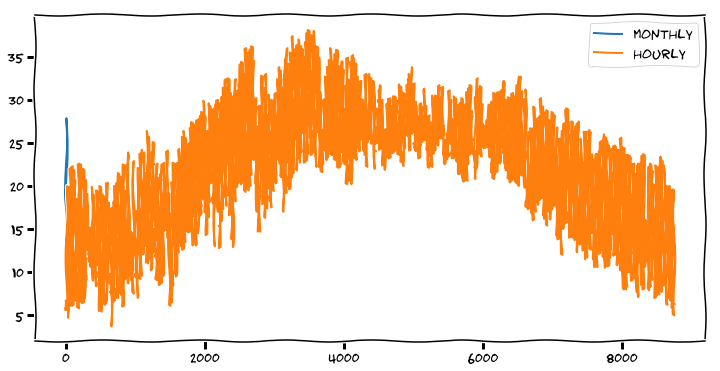

In [54]:
plt.figure(figsize=[12,6])
plt.plot(ddn_summary['month'], ddn_summary['tdb'])
plt.plot(range(0, ddn.shape[0]), ddn['tdb'])
plt.legend(['monthly', 'hourly'])
plt.show()

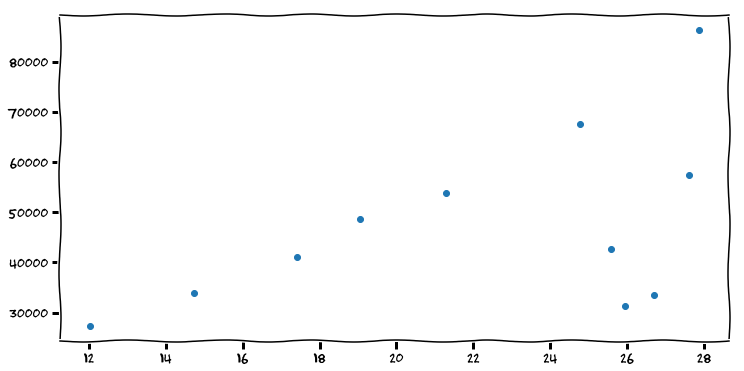

In [56]:
plt.figure(figsize=[12,6])
plt.scatter(ddn_summary['tdb'], ddn_summary['energy'])
plt.show()